## Data Integration merge all text

In [ ]:
import pandas as pd
import ast
from datetime import datetime, timezone

df = pd.read_csv('Original Data.csv')  # Replace 'your_file.csv' with your actual file path

# Create DataFrame
post_data = pd.DataFrame(df)

# Step 1: Combine Title, Text, and Comments Data into separate rows

# Convert Comments Data from string format to list
post_data['Comments Data'] = post_data['Comments Data'].apply(ast.literal_eval)

# Prepare the DataFrame for expanding to multiple rows
expanded_data = []

# Add the Title and Text as separate rows
for _, row in post_data.iterrows():
    # Add the title as a row
    expanded_data.append({'Text': row['Title'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add the text (if available)
    if row['Text']:
        expanded_data.append({'Text': row['Text'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add each comment as a separate row
    for comment in row['Comments Data']:
        expanded_data.append({'Text': comment[0], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(comment[2], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': comment[1], 'Subreddit': row['Subreddit']})

# Create the expanded DataFrame
expanded_df = pd.DataFrame(expanded_data)

expanded_df.to_csv('merge_all_text.csv', index=False)  # Saves the cleaned data to a new file

print(expanded_df)



## Reduce rows from 100000 to 10000

In [61]:
import pandas as pd

def reduce_csv_to_1000_rows(input_csv, output_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)

    # If the dataset has more than 1000 rows, randomly sample 1000 rows
    if len(df) > 1000:
        df_reduced = df.sample(n=7100, random_state=42)  # random_state for reproducibility
    else:
        df_reduced = df  # if there are fewer than 1000 rows, keep all rows

    # Save the reduced dataset to a new CSV file
    df_reduced[["Text", "Subreddit", "Category"]].to_csv(output_csv, index=False)

    print(f"Data reduced and saved to {output_csv}")

# Example usage
input_csv = 'C:/personal/Code/S6/NLP/Slang Classification/Datas/merge_all_text.csv'  # Replace with your input CSV file path
output_csv = 'reduced_output.csv'  # Replace with your desired output file path
reduce_csv_to_1000_rows(input_csv, output_csv)


Data reduced and saved to reduced_output.csv


# Reduce again for labeling

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
# Load the dataset
file_path = 'reduced_output_10000.csv'
df = pd.read_csv(file_path)

text_column = 'Text'  # Replace with the actual column name containing text
label_column = 'Category'  # Replace with the actual label column name

# Show the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       9939 non-null   object
 1   Subreddit  10000 non-null  object
 2   Category   10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [14]:
df = df.dropna(subset=['Text'])
df = df.drop_duplicates()

## Cleaning data for labeling

In [18]:
# 1. Case Folding
def case_folding(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    else:
        return ""  # Return an empty string for non-string values

In [19]:
# 2. Data Cleaning (remove unwanted characters)
def clean_text(text):
    # Remove HTML tags, URLs, mentions (@user), hashtags (#), emojis, digits, and punctuation
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    # text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

In [20]:
# Apply all steps to the dataset
def preprocess_text(text):
    text = case_folding(text)  # Step 1: Case folding
    text = clean_text(text)  # Step 2: Data cleaning
    return text

In [21]:
# Apply preprocessing to each row in the dataset
df['Text'] = df[text_column].apply(preprocess_text)

In [22]:
df = df.sample(n=2000, random_state=42)  # random_state for reproducibility

In [23]:
df[["Text", "Subreddit", "Category"]].to_csv('ready_for_labelling.csv', index=False)

# Dataset Load

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Load the dataset
file_path = 'ready_for_labelling - ready_for_labelling.csv'
df = pd.read_csv(file_path)

text_column = 'Text'  # Replace with the actual column name containing text
label_column = 'Category'  # Replace with the actual label column name

# Show the first few rows of the dataset
df.head()

,Text,Subreddit,Category
0,im someone who takes long showers too and i ne...,funny,Internet Slang
1,look up the sankebetsu brown bear incident,NoStupidQuestions,No Slang
2,this is all i know about the british and somet...,memes,No Slang
3,and a bunch of people put down k deposits for ...,OutOfTheLoop,Casual Slang
4,wade boggs gone too soon,AskReddit,No Slang


In [4]:
# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocessing

In [5]:
df = df.dropna(subset=['Text'])
df = df.drop_duplicates()

In [6]:
# 1. Case Folding
def case_folding(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    else:
        return ""  # Return an empty string for non-string values

In [7]:
# 2. Data Cleaning (remove unwanted characters)
def clean_text(text):
    # Remove HTML tags, URLs, mentions (@user), hashtags (#), emojis, digits, and punctuation
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    return text

In [8]:
# 3. Tokenization
def tokenize(text):
    return text.split()

In [9]:
# 4. Stopwords Removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Change to 'english' for English stopwords
    return [word for word in tokens if word not in stop_words]

In [10]:
# 5. Stemming and Lemmatization
def stem_and_lemmatize(tokens, use_stemming=True):
    if use_stemming:
        return [stemmer.stem(word) for word in tokens]
    else:
        return [lemmatizer.lemmatize(word) for word in tokens]

In [11]:
# 6. Manual Padding/Truncating
def padding_truncating(tokens, max_len=100):
    # If the sequence is shorter than max_len, pad with 'PAD' tokens
    if len(tokens) < max_len:
        tokens += ['PAD'] * (max_len - len(tokens))
    # If the sequence is longer than max_len, truncate it
    elif len(tokens) > max_len:
        tokens = tokens[:max_len]
    return tokens

In [12]:
# Apply all steps to the dataset
def preprocess_text(text, use_stemming=True):
    text = case_folding(text)  # Step 1: Case folding
    text = clean_text(text)  # Step 2: Data cleaning
    tokens = tokenize(text)  # Step 3: Tokenization
    tokens = remove_stopwords(tokens)  # Step 4: Stopwords removal
    tokens = stem_and_lemmatize(tokens, use_stemming)  # Step 5: Stemming/Lemmatization
    return tokens

In [13]:
# Apply preprocessing to each row in the dataset
df['processed_text'] = df[text_column].apply(preprocess_text)

In [14]:
# Example of Padding/Truncating and Text-to-Numeric Transformation
# Assuming 'processed_text' column contains tokenized text
df['padded_text'] = df['processed_text'].apply(lambda x: padding_truncating(x, max_len=100))

In [15]:
# Define a custom mapping for categories
category_mapping = {
    "Casual Slang": 0,
    "Internet Slang": 1,
    "Offensive Slang": 2,
    "No Slang": 3
}

# Apply the mapping to the 'Category' column
df["Category_Label"] = df["Category"].map(category_mapping)

# Check the results
print(df[["Category", "Category_Label"]].head(10))

         Category  Category_Label
0  Internet Slang             1.0
1        No Slang             3.0
2        No Slang             3.0
3    Casual Slang             0.0
4        No Slang             3.0
5    Casual Slang             0.0
6        No Slang             3.0
7        No Slang             3.0
8        No Slang             3.0
9        No Slang             3.0


# Vectorize

# Models Building

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [18]:
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['padded_text', 'Category_Label'])

X = df['padded_text'].apply(lambda x: ' '.join(x))  # Join tokens back into text for TF-IDF
y = df['Category_Label']  # The encoded label column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Set max features to limit the number of tokens
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

## Bert

In [139]:
df = df.dropna(subset=['processed_text', 'Category_Label'])
X = df['processed_text'].apply(lambda x: ' '.join(x))  # Use plain text for BERT
y = df['Category_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pass X_train and X_test (still strings) directly to the BERT dataset class


In [140]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import RobertaTokenizer, RobertaForSequenceClassification, get_scheduler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
import numpy as np

# 1. Tokenizer & Model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(y.unique()))

# 2. Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer(text,
                                  truncation=True,
                                  padding='max_length',
                                  max_length=self.max_len,
                                  return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 3. Prepare DataLoaders
train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = TextDataset(X_test.tolist(), y_test.tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 4. Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 4
total_steps = len(train_loader) * num_epochs

lr_scheduler = get_scheduler("linear",
                             optimizer=optimizer,
                             num_warmup_steps=0,
                             num_training_steps=total_steps)

# 5. Training Loop
model.train()
for epoch in range(num_epochs):
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        loop.set_postfix(loss=loss.item())

# 6. Evaluation
def evaluate(loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    prec = precision_score(all_labels, all_preds, average='weighted')
    rec = recall_score(all_labels, all_preds, average='weighted')

    return acc, f1, prec, rec

train_metrics = evaluate(train_loader)
test_metrics = evaluate(test_loader)

print(f"Train Accuracy:  {train_metrics[0]:.4f}, F1: {train_metrics[1]:.4f}, Precision: {train_metrics[2]:.4f}, Recall: {train_metrics[3]:.4f}")
print(f"Test Accuracy:   {test_metrics[0]:.4f}, F1: {test_metrics[1]:.4f}, Precision: {test_metrics[2]:.4f}, Recall: {test_metrics[3]:.4f}")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 4: 100%|██████████| 22/22 [02:23<00:00,  6.53s/it, loss=0.789]
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy:  0.6414, F1: 0.5013, Precision: 0.4114, Recall: 0.6414
Test Accuracy:   0.7027, F1: 0.5800, Precision: 0.4938, Recall: 0.7027


c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1. Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 64.80%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2           3  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.647959  0.647959    0.161990      0.419851
recall      0.0   0.0   0.0    1.000000  0.647959    0.250000      0.647959
f1-score    0.0   0.0   0.0    0.786378  0.647959    0.196594      0.509541
support    43.0  71.0  24.0  254.000000  0.647959  392.000000    392.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0   0  43]
 [  0   0   0  71]
 [  0   0   0  24]
 [  0   0   0 254]]

Test Result:
Accuracy Score: 70.71%
_______________________________________________
CLASSIFICATION REPORT:
             0     1    2          3  accuracy  macro avg  weighted avg
precision  0.0   0.0  0.0   0.707071  0.707071   0.176768      0.499949
recall     0.0   0.0  0.0   1.000000  0.707071   0.250000      0.707071
f1-score   0.0   0.0  0.0   0.828402  0.707

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [105]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,64.795918,70.707071


# 2. K-nearest neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 65.31%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0         3.0  accuracy   macro avg  \
precision   1.000000   1.000000   0.666667    0.649852  0.653061    0.829130   
recall      0.026316   0.031250   0.095238    0.995455  0.653061    0.287065   
f1-score    0.051282   0.060606   0.166667    0.786355  0.653061    0.266228   
support    38.000000  64.000000  21.000000  220.000000  0.653061  343.000000   

           weighted avg  
precision      0.755007  
recall         0.653061  
f1-score       0.531562  
support      343.000000  
_______________________________________________
Confusion Matrix: 
 [[  1   0   0  37]
 [  0   2   0  62]
 [  0   0   2  19]
 [  0   0   1 219]]

Test Result:
Accuracy Score: 69.59%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,64.139942,70.270270
1,K-nearest neighbors,65.306122,69.594595


# Support Vector Machine

In [67]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 64.14%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.641399  0.641399    0.160350      0.411393
recall      0.0   0.0   0.0    1.000000  0.641399    0.250000      0.641399
f1-score    0.0   0.0   0.0    0.781528  0.641399    0.195382      0.501271
support    38.0  64.0  21.0  220.000000  0.641399  343.000000    343.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0   0  38]
 [  0   0   0  64]
 [  0   0   0  21]
 [  0   0   0 220]]

Test Result:
Accuracy Score: 70.27%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.702703  0.702703    0.175676      0.493791
recall      0.0   0.0   0.0    1.000000  0.702703    0.250000      0.702703
f1-score    0.0   0.0   0.0    

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [68]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,64.139942,70.270270
1,K-nearest neighbors,65.306122,69.594595
2,Support Vector Machine,64.139942,70.270270


# 4. Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2      3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0    1.0       1.0        1.0           1.0
support    43.0  71.0  24.0  254.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[ 43   0   0   0]
 [  0  71   0   0]
 [  0   0  24   0]
 [  0   0   0 254]]

Test Result:
Accuracy Score: 68.69%
_______________________________________________
CLASSIFICATION REPORT:
                  0          1         2          3  accuracy  macro avg  \
precision  0.166667   0.500000  0.666667   0.756410  0.686869   0.522436   
recall     0.166667   0.375000  0.285714   0.842857  0.686869   0.417560   
f1-score   0.166667   0.428571  0.400000   0.797297  0.68686

In [103]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df



NameError: name 'results_df' is not defined

#  5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       1.00      0.19      0.32        16
         2.0       1.00      0.14      0.25         7
         3.0       0.74      1.00      0.85        70

    accuracy                           0.75        99
   macro avg       0.68      0.33      0.35        99
weighted avg       0.75      0.75      0.67        99

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0    3.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0    1.0       1.0        1.0           1.0
support    43.0  71.0  24.0  254.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df



,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,64.139942,70.270270
1,K-nearest neighbors,65.306122,69.594595
2,Support Vector Machine,64.139942,70.270270
3,Decision Tree Classifier,100.000000,59.459459
4,Random Forest Classifier,100.000000,72.972973


# 6. XGBoost Classifer

In [73]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:04:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Result:
Accuracy Score: 98.83%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0   2.0         3.0  accuracy   macro avg  \
precision   1.000000   1.000000   1.0    0.982143  0.988338    0.995536   
recall      0.973684   0.953125   1.0    1.000000  0.988338    0.981702   
f1-score    0.986667   0.976000   1.0    0.990991  0.988338    0.988414   
support    38.000000  64.000000  21.0  220.000000  0.988338  343.000000   

           weighted avg  
precision      0.988546  
recall         0.988338  
f1-score       0.988266  
support      343.000000  
_______________________________________________
Confusion Matrix: 
 [[ 37   0   0   1]
 [  0  61   0   3]
 [  0   0  21   0]
 [  0   0   0 220]]

Test Result:
Accuracy Score: 63.51%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0         3.0  accuracy   macro avg  \
precision   0.125000   0.230769   0.500000    0.71200

In [74]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,64.139942,70.270270
1,K-nearest neighbors,65.306122,69.594595
2,Support Vector Machine,64.139942,70.270270
3,Decision Tree Classifier,100.000000,59.459459
4,Random Forest Classifier,100.000000,72.972973
5,XGBoost Classifier,98.833819,63.513514


# 🤖 Models Hyperparameter Tuning

In [22]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.0001, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 64.80%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.647959  0.647959    0.161990      0.419851
recall      0.0   0.0   0.0    1.000000  0.647959    0.250000      0.647959
f1-score    0.0   0.0   0.0    0.786378  0.647959    0.196594      0.509541
support    43.0  71.0  24.0  254.000000  0.647959  392.000000    392.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0   0  43]
 [  0   0   0  71]
 [  0   0   0  24]
 [  0   0   0 254]]

Test Result:
Accuracy Score: 70.71%
_______________________________________________
CLASSIFICATION REPORT:
           0.0   1.0  2.0        3.0  accuracy  macro avg  weighted avg
precision  0.0   0.0  0.0   0.707071  0.707071   0.176768      0.499949

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [77]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,64.139942,70.27027


# 2. K-nearest neighbors Hyperparameter Tuning

In [78]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


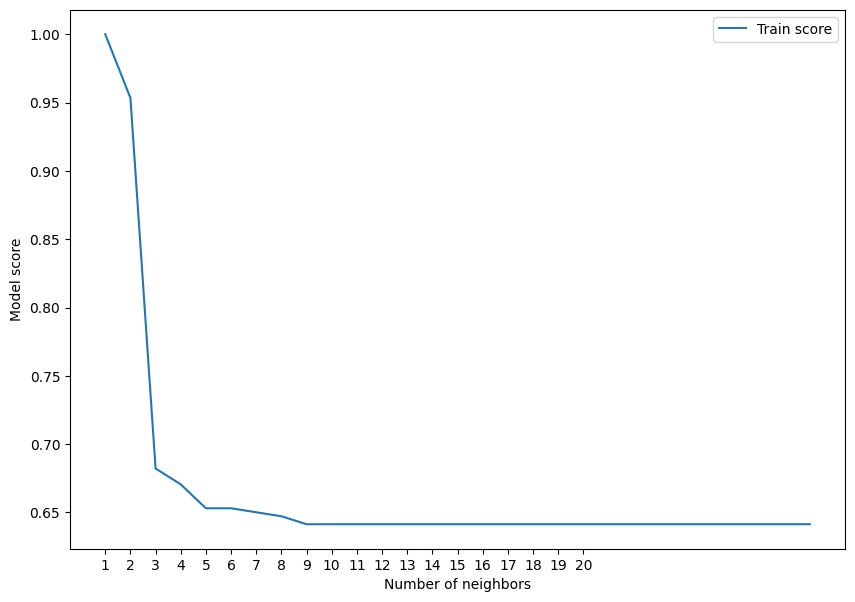

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")



In [80]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 64.14%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.641399  0.641399    0.160350      0.411393
recall      0.0   0.0   0.0    1.000000  0.641399    0.250000      0.641399
f1-score    0.0   0.0   0.0    0.781528  0.641399    0.195382      0.501271
support    38.0  64.0  21.0  220.000000  0.641399  343.000000    343.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0   0  38]
 [  0   0   0  64]
 [  0   0   0  21]
 [  0   0   0 220]]

Test Result:
Accuracy Score: 70.27%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.702703  0.702703    0.175676      0.493791
recall      0.0   0.0   0.0    1.000000  0.702703    0.250000      0.702703
f1-score    0.0   0.0   0.0    

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [81]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,64.139942,70.27027
1,Tuned K-nearest neighbors,64.139942,70.27027


# 3. Support Vector Machine Hyperparameter Tuning

In [82]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 64.14%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.641399  0.641399    0.160350      0.411393
recall      0.0   0.0   0.0    1.000000  0.641399    0.250000      0.641399
f1-score    0.0   0.0   0.0    0.781528  0.641399    0.195382      0.501271
support    38.0  64.0  21.0  220.000000  0.641399  343.000000    343.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0   0  38]
 [  0   0   0  64]
 [  0   0   0  21]
 [  0   0   0 220]]

Test Result:
Accuracy Score: 70.27%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0         3.0  accuracy   macro avg  weighted avg
precision   0.0   0.0   0.0    0.702703  0.702703    0.17567

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [83]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,64.139942,70.27027
1,Tuned K-nearest neighbors,64.139942,70.27027
2,Tuned Support Vector Machine,64.139942,70.27027


# 4. Decision Tree Classifier Hyperparameter Tuning

In [196]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 67.69%
_______________________________________________
CLASSIFICATION REPORT:
              0           1     2          3           4  accuracy  \
precision   0.0    0.818182   0.0   0.812500    0.663093   0.67688   
recall      0.0    0.247706   0.0   0.320988    0.993119   0.67688   
f1-score    0.0    0.380282   0.0   0.460177    0.795225   0.67688   
support    45.0  109.000000  47.0  81.000000  436.000000   0.67688   

            macro avg  weighted avg  
precision    0.458755      0.618528  
recall       0.312363      0.676880  
f1-score     0.327137      0.592539  
support    718.000000    718.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   1   0   2  42]
 [  0  27   0   1  81]
 [  0   0   0   0  47]
 [  0   5   0  26  50]
 [  0  

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [197]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766
2,Tuned Support Vector Machine,100.000000,67.207792
3,Tuned Decision Tree Classifier,67.688022,69.805195


# 5. Random Forest Classifier Hyperparameter Tuning

In [23]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1279 fits failed with the following error:
Traceback (most recent call last):
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\personal\Code\

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0    3.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0    1.0       1.0        1.0           1.0
support    43.0  71.0  24.0  254.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[ 43   0   0   0]
 [  0  71   0   0]
 [  0   0  24   0]
 [  0   0   0 254]]

Test Result:
Accuracy Score: 74.75%
_______________________________________________
CLASSIFICATION REPORT:
           0.0        1.0       2.0        3.0  accuracy  macro avg  \
precision  0.0   1.000000  1.000000   0.736842  0.747475   0.684211 

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [199]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766
2,Tuned Support Vector Machine,100.000000,67.207792
3,Tuned Decision Tree Classifier,67.688022,69.805195
4,Tuned Random Forest Classifier,99.860724,69.480519


# 6. XGBoost Classifier Hyperparameter Tuning

In [200]:
from scipy import stats

param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


KeyboardInterrupt: 

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned XGBoost Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

In [ ]:
results_df

# 6. Features Importance According to Random Forest and XGBoost

In [203]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.Text
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [204]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

AttributeError: 'csr_matrix' object has no attribute 'Text'

In [ ]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)